In [ ]:
#Reading and Understanding the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
bike=pd.read_csv('day.csv')

In [ ]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#Check for null

bike.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [ ]:
#Creating the dummy variable
bike.nunique()


instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [ ]:
bike_cat=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit']]
bike_cont=bike[['instant','temp','atemp','hum','windspeed','casual','registered']]
bike_target=bike['cnt']

In [ ]:
#Univarient Analysis
for i in bike_cont:
  sns.histplot(x=bike[i])
  plt.show()

In [ ]:
for i in bike_cont:
  sns.boxplot(x=bike[i])
  plt.show()

In [ ]:
#Bivariate Analysis

for i in bike_cont:
  sns.scatterplot(x=bike[i],y=bike['cnt'])
  plt.show()

In [ ]:
for i in bike_cont:
  sns.regplot(data=bike,x=bike[i],y=bike['cnt'])
  plt.show()

<Axes: >

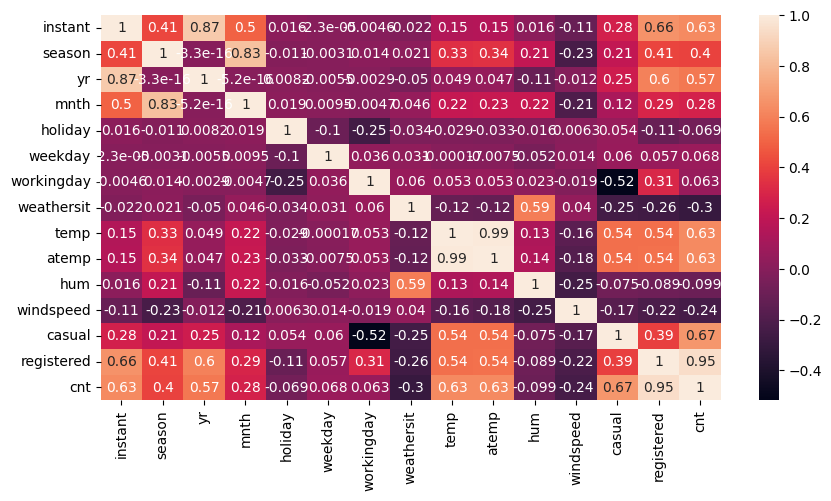

In [ ]:
#Check Correlation
plt.figure(figsize=(10,5))
sns.heatmap(bike.corr(),annot=True)

In [ ]:
bike_cat['season']=bike_cat['season'].astype('category')
bike_cat['weathersit']=bike_cat['weathersit'].astype('category')
bike_cat['mnth']=bike_cat['mnth'].astype('category')
bike_cat['weekday']=bike_cat['weekday'].astype('category')

In [ ]:
bike_cat=pd.get_dummies(bike_cat, drop_first=True)

In [ ]:
bike_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            730 non-null    int64
 1   holiday       730 non-null    int64
 2   workingday    730 non-null    int64
 3   season_2      730 non-null    uint8
 4   season_3      730 non-null    uint8
 5   season_4      730 non-null    uint8
 6   mnth_2        730 non-null    uint8
 7   mnth_3        730 non-null    uint8
 8   mnth_4        730 non-null    uint8
 9   mnth_5        730 non-null    uint8
 10  mnth_6        730 non-null    uint8
 11  mnth_7        730 non-null    uint8
 12  mnth_8        730 non-null    uint8
 13  mnth_9        730 non-null    uint8
 14  mnth_10       730 non-null    uint8
 15  mnth_11       730 non-null    uint8
 16  mnth_12       730 non-null    uint8
 17  weekday_1     730 non-null    uint8
 18  weekday_2     730 non-null    uint8
 19  weekday_3     730 non-null   

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       730 non-null    int64  
 1   dteday        730 non-null    object 
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   casual        730 non-null    int64  
 7   registered    730 non-null    int64  
 8   cnt           730 non-null    int64  
 9   yr            730 non-null    int64  
 10  holiday       730 non-null    int64  
 11  workingday    730 non-null    int64  
 12  season_2      730 non-null    uint8  
 13  season_3      730 non-null    uint8  
 14  season_4      730 non-null    uint8  
 15  mnth_2        730 non-null    uint8  
 16  mnth_3        730 non-null    uint8  
 17  mnth_4        730 non-null    uint8  
 18  mnth_5        730 non-null    

In [ ]:
bike=bike.drop(['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit'],axis=1)

KeyError: ignored

In [ ]:
bike=pd.concat((bike,bike_cat), axis=1)

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       730 non-null    int64  
 1   dteday        730 non-null    object 
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   casual        730 non-null    int64  
 7   registered    730 non-null    int64  
 8   cnt           730 non-null    int64  
 9   yr            730 non-null    int64  
 10  holiday       730 non-null    int64  
 11  workingday    730 non-null    int64  
 12  season_2      730 non-null    uint8  
 13  season_3      730 non-null    uint8  
 14  season_4      730 non-null    uint8  
 15  mnth_2        730 non-null    uint8  
 16  mnth_3        730 non-null    uint8  
 17  mnth_4        730 non-null    uint8  
 18  mnth_5        730 non-null    

In [ ]:
#train-test split



In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(bike,train_size=0.7,random_state=100)

In [ ]:
df_train.info()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_train.columns


Index(['instant', 'dteday', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'yr', 'holiday', 'workingday', 'season_2',
       'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,yr,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,577,31-07-2019,0.815169,0.766351,0.725633,0.264686,968,6248,0.827658,1,...,0,0,0,1,0,0,0,0,0,0
426,427,03-03-2019,0.442393,0.438975,0.640189,0.255342,956,3110,0.465255,1,...,0,0,0,0,0,0,0,1,1,0
728,729,30-12-2019,0.245101,0.200348,0.498067,0.663106,364,1432,0.204096,1,...,0,1,0,0,0,0,0,0,0,0
482,483,28-04-2019,0.395666,0.391735,0.504508,0.188475,1120,3100,0.482973,1,...,0,0,0,0,0,0,0,1,1,0
111,112,22-04-2018,0.345824,0.318819,0.751824,0.380981,177,1506,0.191095,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
#Building the model
bike=bike.drop(['dteday'], axis=1)
X_train=bike.drop(['cnt']  ,axis=1)
y_train=bike['cnt']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)